In [105]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from scipy.fftpack import idct, dct, fft, rfft, fftshift
from tqdm import tqdm_notebook as tqdm
from scipy import stats

In [106]:
im1 = np.array(imageio.imread('test1.png')).astype('int64')
im2 = np.array(imageio.imread('test2.png')).astype('int64')
im3 = np.array(imageio.imread('test3.png')).astype('int64')
im4 = np.array(imageio.imread('test_images/male.png')).astype('int64')
im5 = np.array(imageio.imread('test_images/male_70.jpg')).astype('int64')
im6 = np.array(imageio.imread('test_images/male_55_70.jpg')).astype('int64')


# Binary decision - compressed or not?
## Blockiness algorithm

In [107]:
def get_blocks(im):
    A = im[3::8,3::8]
    B = im[3::8,4::8]
    C = im[4::8,3::8]
    D = im[4::8,4::8]

    E = im[7:-1:8,7:-1:8]
    F = im[7:-1:8,8::8]
    G = im[8::8,7:-1:8]
    H = im[8::8,8::8]
    
    return A,B,C,D,E,F,G,H
    

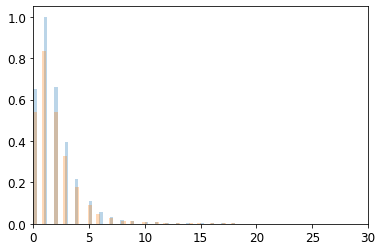

In [108]:
A,B,C,D,E,F,G,H = get_blocks(im1)
plt.hist(np.abs(A - B - C + D).flatten(), bins = 170, density = True, alpha = 0.3)
plt.hist(np.abs(E - F - G + H).flatten(), bins = 170, density = True, alpha = 0.3)

plt.xlim(0,30)
plt.show()


In [109]:
A,B,C,D,E,F,G,H = get_blocks(im1)
hist1, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

In [110]:
A,B,C,D,E,F,G,H = get_blocks(im2)
hist1b, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2b, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

In [111]:
A,B,C,D,E,F,G,H = get_blocks(im3)
hist1c, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2c, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

In [112]:
A,B,C,D,E,F,G,H = get_blocks(im4)
hist1d, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2d, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

In [113]:
A,B,C,D,E,F,G,H = get_blocks(im5)
hist1e, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2e, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

In [114]:
A,B,C,D,E,F,G,H = get_blocks(im6)
hist1f, _ = np.histogram(np.abs(A - B - C + D).flatten()[0:200000],range=(0,30), density = True, bins=30)
hist2f, _ = np.histogram(np.abs(E - F - G + H).flatten()[0:200000],range=(0,30), density = True, bins=30)

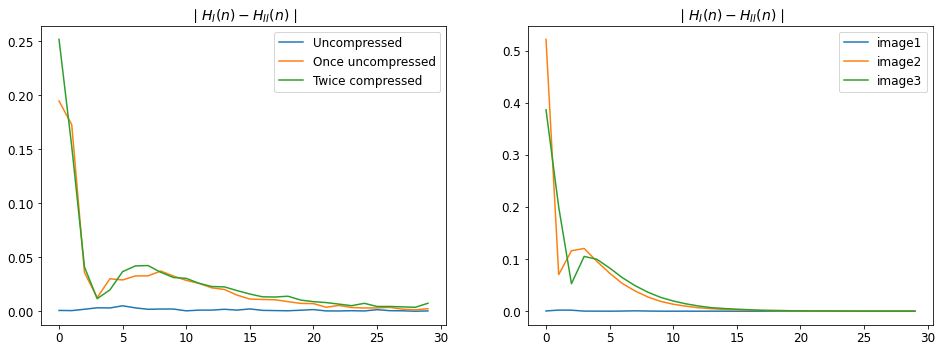

In [115]:
#after the above code has been run for each image and variables have been assigned, the shown plot will result

fig, ax = plt.subplots(1, 2, figsize = (16,5.5))

ax[0].plot(np.abs(hist1d - hist2d), label = 'Uncompressed')
ax[0].plot(np.abs(hist1e - hist2e), label = 'Once uncompressed')
ax[0].plot(np.abs(hist1f - hist2f), label = 'Twice compressed')
#plt.plot(np.abs(hist1d - hist2d), label = 'challah')
ax[0].legend()
ax[0].set_title(r'$\mid H_{I}(n)-H_{I I}(n)\mid$', size = 14)

ax[1].plot(np.abs(hist1 - hist2), label = 'image1')
ax[1].plot(np.abs(hist1b - hist2b), label = 'image2')
ax[1].plot(np.abs(hist1c - hist2c), label = 'image3')

ax[1].legend()
ax[1].set_title(r'$\mid H_{I}(n)-H_{I I}(n)\mid$', size = 14)
plt.show()

#plt.show()
#fig.savefig('Figures/histogram_diffs_final.png')

# DCT analysis

In [116]:
all_coefs = []

for im in tqdm([im1,im2,im3,im4,im5,im6]):
    DCT_coefs = []

    #Do DCT
    for i in tqdm(range(int(im.shape[0]/8))):

        for j in range(int(im.shape[1]/8)):
            block = im[8*i:8*(i+1),8*j:8*(j+1)]

            #ignore uniform blocks
            if min(block.flatten()) == max(block.flatten()):#list(block.flatten()).count(block.flatten()[0]) == len(block.flatten()):
                #print('hey')
                continue

            #ignore blocks with 0 or 255
            if (0 in block.flatten()) or (255 in block.flatten()):
                #print('hi')
                continue

            DCT_coefs.append(dct(dct(block, norm = 'ortho').T, norm = 'ortho').T)
    all_coefs.append(DCT_coefs)

/Users/IsaacSebenius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/IsaacSebenius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [117]:
#DCT_coefs1 = np.array(DCT_coefs)
DCT_coefs1 = np.array(all_coefs[0])

In [118]:
#DCT_coefs2 = np.array(DCT_coefs)
DCT_coefs2 = np.array(all_coefs[1])

In [119]:
#DCT_coefs3 = np.array(DCT_coefs)
DCT_coefs3 = np.array(all_coefs[2])

In [120]:
#DCT_male1 = np.array(DCT_coefs)
DCT_male1 = np.array(all_coefs[3])

In [121]:
#DCT_male2 = np.array(DCT_coefs)
DCT_male2 = np.array(all_coefs[4])

In [122]:
#DCT_male3 = np.array(DCT_coefs)
DCT_male3 = np.array(all_coefs[5])

# Once or twice compressed? Looking at the DCT coefficient histograms and their FFTs

In [123]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [124]:
plt.close()

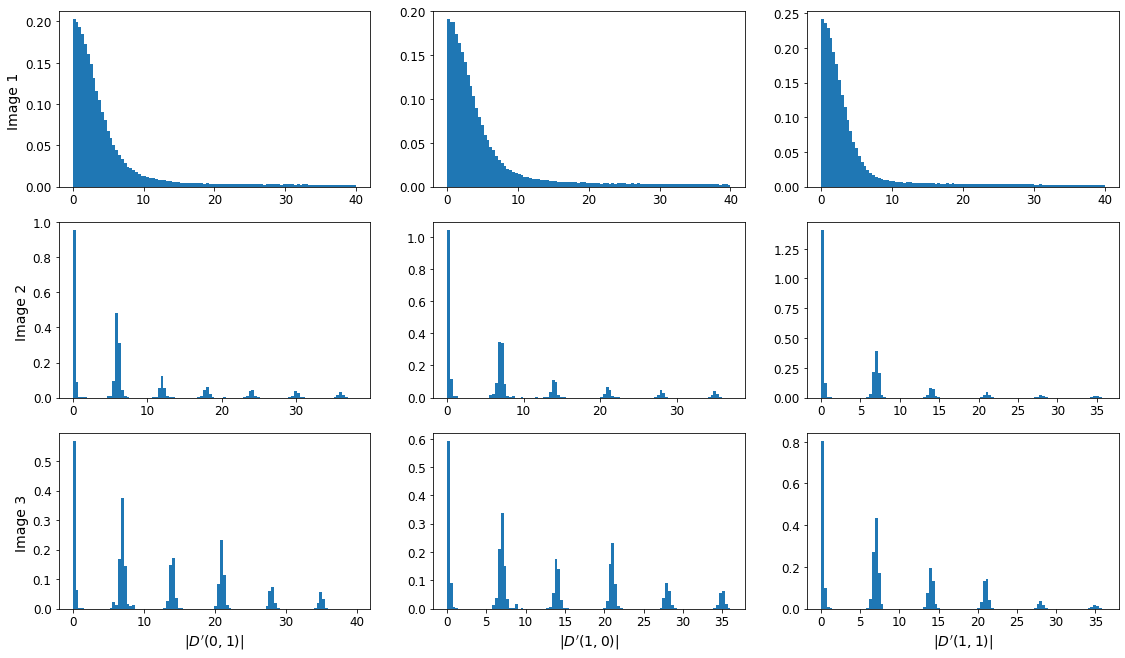

In [125]:
mn = [[0,1],[1,0],[1,1]]
fig, ax = plt.subplots(3,3, figsize = (19,11))
for i, x in enumerate(mn):
    m,n = x[0],x[1]
    cutoff = 40

    w = DCT_coefs1[:,m,n][np.where(np.abs(DCT_coefs1[:,m,n]) <= cutoff)]
    w2 = DCT_coefs2[:,m,n][np.where(np.abs(DCT_coefs2[:,m,n]) <= cutoff)]
    w3 = DCT_coefs3[:,m,n][np.where(np.abs(DCT_coefs3[:,m,n]) <= cutoff)]


    bins1 = len(list(range(int(np.floor(min(w))), int(np.ceil(max(w))))))
    bins2 = len(list(range(int(np.floor(min(w2))), int(np.ceil(max(w2))))))
    bins3 = len(list(range(int(np.floor(min(w3))), int(np.ceil(max(w3))))))

    ax[0][i].hist(np.abs(w), density = True, bins = 100)
    ax[1][i].hist(np.abs(w2),density = True, bins = 100)
    ax[2][i].hist(np.abs(w3),density = True, bins = 100)
    
ax[0][0].set_ylabel('Image 1 ',rotation=90)
ax[1][0].set_ylabel('Image 2 ',rotation=90)
ax[2][0].set_ylabel('Image 3 ',rotation=90)

#fig.suptitle('Distribution of DCT coefficients')
#ax[0][0].set_title('Position (0,1)')
#ax[0][1].set_title('Position (1,0)')
#ax[0][2].set_title('Position (1,1)')

ax[2][0].set_xlabel(r'$\left|D^{\prime}(0,1)\right|$')
ax[2][1].set_xlabel(r'$\left|D^{\prime}(1,0)\right|$')
ax[2][2].set_xlabel(r'$\left|D^{\prime}(1,1)\right|$')
#ax.flat[0].set(xlabel='DCT coefficients', ylabel='(0,1)')
fig.savefig('Figures/Coefs.png')
plt.show()

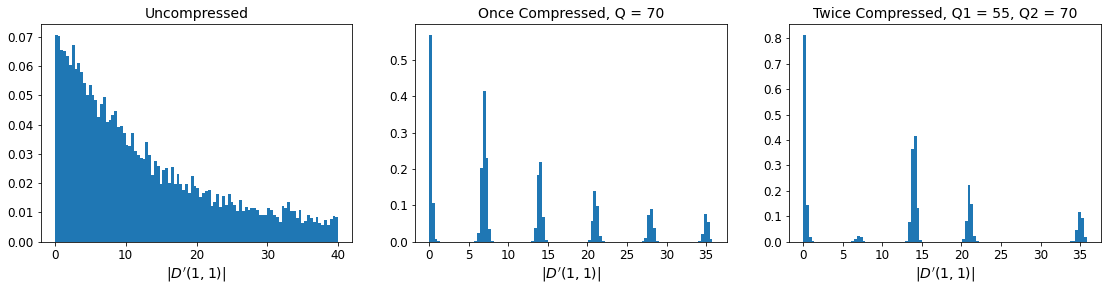

In [126]:
mn = [[1,1]]
fig, ax = plt.subplots(1,3, figsize = (19,4))
for i, x in enumerate(mn):
    m,n = x[0],x[1]
    cutoff = 40

    w = DCT_male1[:,m,n][np.where(np.abs(DCT_male1[:,m,n]) <= cutoff)]
    w2 = DCT_male2[:,m,n][np.where(np.abs(DCT_male2[:,m,n]) <= cutoff)]
    w3 = DCT_male3[:,m,n][np.where(np.abs(DCT_male3[:,m,n]) <= cutoff)]


    bins1 = len(list(range(int(np.floor(min(w))), int(np.ceil(max(w))))))
    bins2 = len(list(range(int(np.floor(min(w2))), int(np.ceil(max(w2))))))
    bins3 = len(list(range(int(np.floor(min(w3))), int(np.ceil(max(w3))))))

    ax[0].hist(np.abs(w), density = True, bins = 100)
    ax[1].hist(np.abs(w2),density = True, bins = 100)
    ax[2].hist(np.abs(w3),density = True, bins = 100)
    
#plt.tight_layout()
ax[0].set_title('Uncompressed', size = 14)
ax[1].set_title('Once Compressed, Q = 70', size = 14)
ax[2].set_title('Twice Compressed, Q1 = 55, Q2 = 70', size = 14)

#fig.suptitle('Distribution of DCT coefficients')
#ax[0][0].set_title('Position (0,1)')
#ax[0][1].set_title('Position (1,0)')
#ax[0][2].set_title('Position (1,1)')

ax[0].set_xlabel(r'$\left|D^{\prime}(1,1)\right|$')
ax[1].set_xlabel(r'$\left|D^{\prime}(1,1)\right|$')
ax[2].set_xlabel(r'$\left|D^{\prime}(1,1)\right|$')
#ax.flat[0].set(xlabel='DCT coefficients', ylabel='(0,1)')
plt.show()
fig.savefig('Figures/Coefs_male_1_1.png')


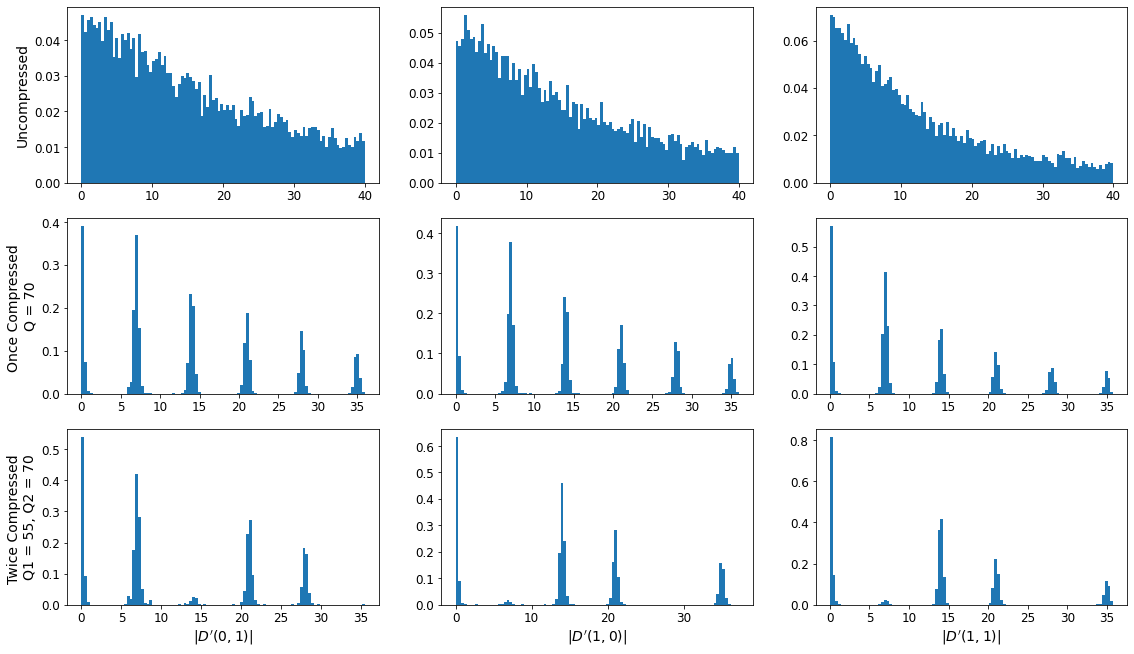

In [127]:
mn = [[0,1],[1,0],[1,1]]
fig, ax = plt.subplots(3,3, figsize = (19,11))
for i, x in enumerate(mn):
    m,n = x[0],x[1]
    cutoff = 40

    w = DCT_male1[:,m,n][np.where(np.abs(DCT_male1[:,m,n]) <= cutoff)]
    w2 = DCT_male2[:,m,n][np.where(np.abs(DCT_male2[:,m,n]) <= cutoff)]
    w3 = DCT_male3[:,m,n][np.where(np.abs(DCT_male3[:,m,n]) <= cutoff)]


    bins1 = len(list(range(int(np.floor(min(w))), int(np.ceil(max(w))))))
    bins2 = len(list(range(int(np.floor(min(w2))), int(np.ceil(max(w2))))))
    bins3 = len(list(range(int(np.floor(min(w3))), int(np.ceil(max(w3))))))

    ax[0][i].hist(np.abs(w), density = True, bins = 100)
    ax[1][i].hist(np.abs(w2),density = True, bins = 100)
    ax[2][i].hist(np.abs(w3),density = True, bins = 100)
    
#plt.tight_layout()
ax[0][0].set_ylabel('Uncompressed')
ax[1][0].set_ylabel('Once Compressed \nQ = 70')
ax[2][0].set_ylabel('Twice Compressed \nQ1 = 55, Q2 = 70')

#fig.suptitle('Distribution of DCT coefficients')
#ax[0][0].set_title('Position (0,1)')
#ax[0][1].set_title('Position (1,0)')
#ax[0][2].set_title('Position (1,1)')

ax[2][0].set_xlabel(r'$\left|D^{\prime}(0,1)\right|$')
ax[2][1].set_xlabel(r'$\left|D^{\prime}(1,0)\right|$')
ax[2][2].set_xlabel(r'$\left|D^{\prime}(1,1)\right|$')
#ax.flat[0].set(xlabel='DCT coefficients', ylabel='(0,1)')
fig.savefig('Figures/Coefs_male.png')
plt.show()

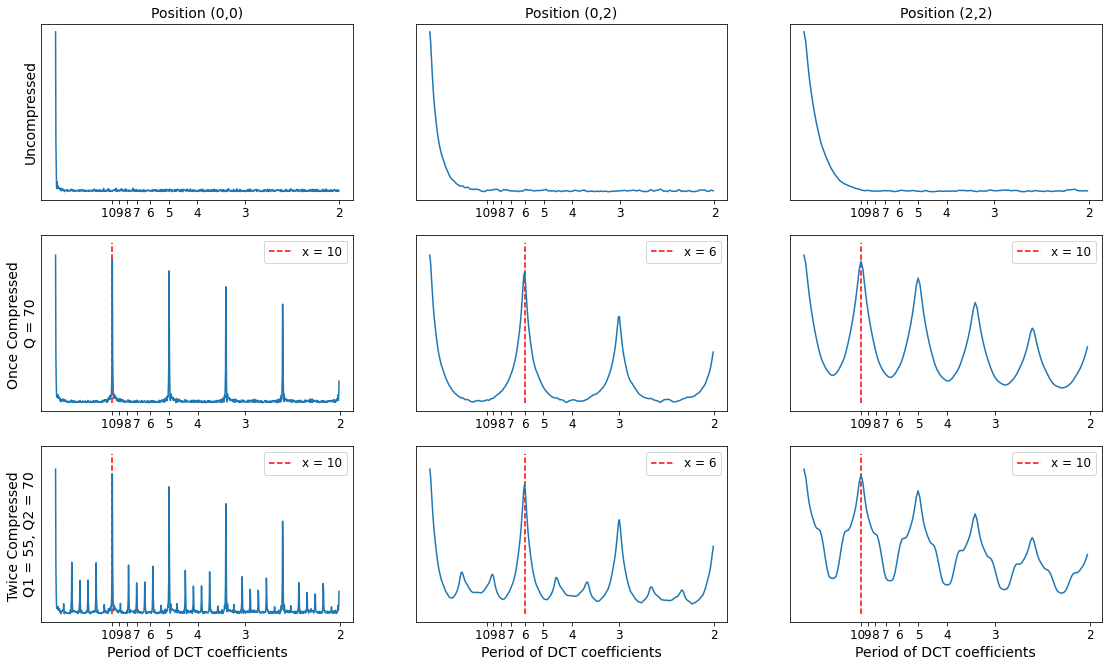

In [128]:
mn = [[0,0],[0,2],[2,2]]
fig, ax = plt.subplots(3,3, figsize = (19,11))
labels = ['2','3','4','5','6','7','8','9','10  ']
for i, x in enumerate(mn):
    m,n = x[0],x[1]
    cutoff = np.inf

    w = DCT_male1[:,m,n][np.where(np.abs(DCT_male1[:,m,n]) <= cutoff)]
    w2 = DCT_male2[:,m,n][np.where(np.abs(DCT_male2[:,m,n]) <= cutoff)]
    w3 = DCT_male3[:,m,n][np.where(np.abs(DCT_male3[:,m,n]) <= cutoff)]


    bins1 = len(list(range(int(np.floor(min(w))), int(np.ceil(max(w))))))
    bins2 = len(list(range(int(np.floor(min(w2))), int(np.ceil(max(w2))))))
    bins3 = len(list(range(int(np.floor(min(w3))), int(np.ceil(max(w3))))))

    #n2 = np.histogram(DCT_coefs2[:,0,1], bins = 256)[0]
    n = np.histogram(w, bins = int(bins1))[0]
    n2 = np.histogram(w2, bins = bins2)[0]
    n3 = np.histogram(w3,  bins = bins3)[0]
    
    xticks1 = []
    xticks2 = []
    xticks3 = []
    
    for x in range(2,11):
        xticks1.append(bins1/x)
        xticks2.append(bins2/x)
        xticks3.append(bins3/x)
        
    
    ax[0][i].plot(np.abs(fft(n))[0:len(n)//2])
    ax[0][i].set_xticks(xticks1)
    ax[0][i].set_xticklabels(labels)
    ax[0][i].set_yticks([])
    
    ax[1][i].plot(np.abs(fft(n2))[0:len(n2)//2])
    ax[1][i].set_xticks(xticks2)
    ax[1][i].set_xticklabels(labels)
    
    if i == 0:
        ax[1][i].vlines(xticks2[8], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 10')
    if i == 1:
        ax[1][i].vlines(xticks2[4], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 6')
    if i == 2:
        ax[1][i].vlines(xticks2[8], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 10')

    ax[1][i].set_yticks([])
    ax[1][i].legend()
    
    ax[2][i].plot(np.abs(fft(n3))[0:len(n3)//2])
    ax[2][i].set_xticks(xticks3)
    ax[2][i].set_xticklabels(labels)
    
    if i == 0:
        ax[2][i].vlines(xticks3[8], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 10')
    if i == 1:
        ax[2][i].vlines(xticks3[4], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 6')
    if i == 2:
        ax[2][i].vlines(xticks3[8], 0, 15000, linestyles='dashed', colors = 'red', label = 'x = 10')

    ax[2][i].legend()
    ax[2][i].set_yticks([])

ax[0][0].set_ylabel('Uncompressed')
ax[1][0].set_ylabel('Once Compressed \nQ = 70')
ax[2][0].set_ylabel('Twice Compressed \nQ1 = 55, Q2 = 70')

ax[0][0].set_title('Position (0,0)', size = 14)
ax[0][1].set_title('Position (0,2)', size = 14)
ax[0][2].set_title('Position (2,2)', size = 14)


ax[2][0].set_xlabel('Period of DCT coefficients')
ax[2][1].set_xlabel('Period of DCT coefficients')
ax[2][2].set_xlabel('Period of DCT coefficients')

fig.savefig('Figures/FFT_of_coefs_male.png')
plt.show()

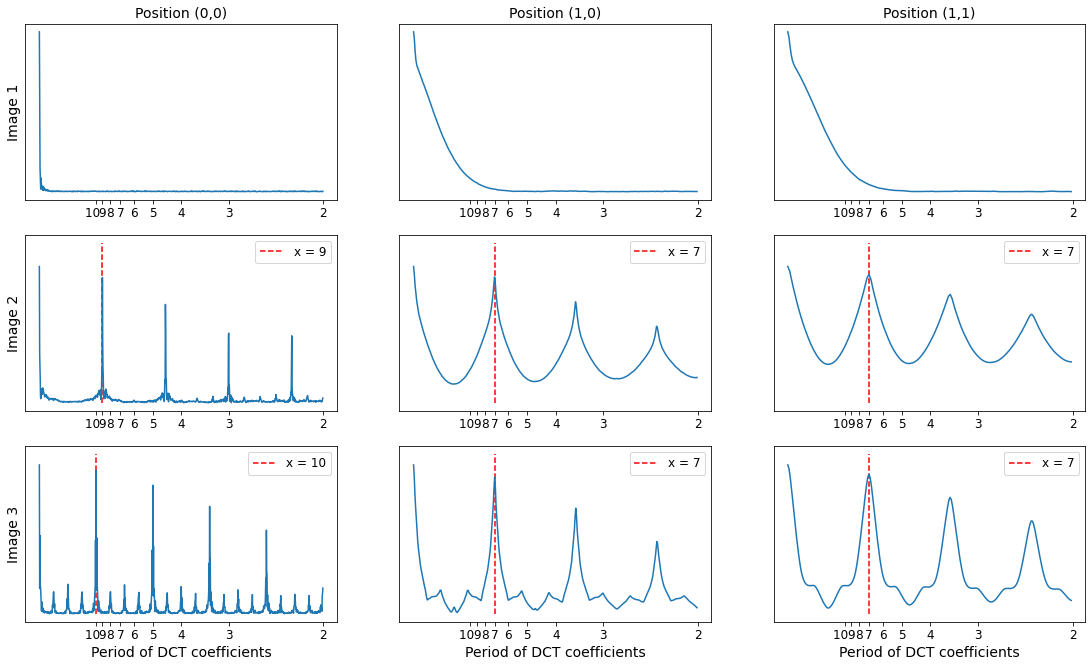

In [129]:
mn = [[0,0],[1,0],[1,1]]
fig, ax = plt.subplots(3,3, figsize = (19,11))
for i, x in enumerate(mn):
    m,n = x[0],x[1]
    cutoff = np.inf

    w = DCT_coefs1[:,m,n][np.where(np.abs(DCT_coefs1[:,m,n]) <= cutoff)]
    w2 = DCT_coefs2[:,m,n][np.where(np.abs(DCT_coefs2[:,m,n]) <= cutoff)]
    w3 = DCT_coefs3[:,m,n][np.where(np.abs(DCT_coefs3[:,m,n]) <= cutoff)]


    bins1 = len(list(range(int(np.floor(min(w))), int(np.ceil(max(w))))))
    bins2 = len(list(range(int(np.floor(min(w2))), int(np.ceil(max(w2))))))
    bins3 = len(list(range(int(np.floor(min(w3))), int(np.ceil(max(w3))))))

    #n2 = np.histogram(DCT_coefs2[:,0,1], bins = 256)[0]
    n = np.histogram(w, bins = int(bins1))[0]
    n2 = np.histogram(w2, bins = bins2)[0]
    n3 = np.histogram(w3,  bins = bins3)[0]
    
    xticks1 = []
    xticks2 = []
    xticks3 = []
    
    for x in range(2,11):
        xticks1.append(bins1/x)
        xticks2.append(bins2/x)
        xticks3.append(bins3/x)
        
    
    ax[0][i].plot(np.abs(fft(n))[0:len(n)//2])
    ax[0][i].set_xticks(xticks1)
    ax[0][i].set_xticklabels(labels)
    ax[0][i].set_yticks([])
    
    ax[1][i].plot(np.abs(fft(n2))[0:len(n2)//2])
    ax[1][i].set_xticks(xticks2)
    ax[1][i].set_xticklabels(labels)
    if i == 0:
        ax[1][i].vlines(xticks2[int(7)], 0, 200000, linestyles='dashed', colors = 'red', label = 'x = 9')
    else:
        ax[1][i].vlines(xticks2[int(5)], 0, 200000, linestyles='dashed', colors = 'red', label = 'x = 7')
    ax[1][i].set_yticks([])
    ax[1][i].legend()
    
    ax[2][i].plot(np.abs(fft(n3))[0:len(n3)//2])
    ax[2][i].set_xticks(xticks3)
    ax[2][i].set_xticklabels(labels)
    if i == 0:
        ax[2][i].vlines(xticks3[int(8)], 0, 200000, linestyles='dashed', colors = 'red', label = 'x = 10')
    else:
        ax[2][i].vlines(xticks3[5], 0, 200000, linestyles='dashed', colors = 'red', label = 'x = 7')
    ax[2][i].legend()
    ax[2][i].set_yticks([])

ax[0][0].set_ylabel('Image 1')
ax[1][0].set_ylabel('Image 2')
ax[2][0].set_ylabel('Image 3')

ax[0][0].set_title('Position (0,0)', size = 14)
ax[0][1].set_title('Position (1,0)', size = 14)
ax[0][2].set_title('Position (1,1)', size = 14)


ax[2][0].set_xlabel('Period of DCT coefficients')
ax[2][1].set_xlabel('Period of DCT coefficients')
ax[2][2].set_xlabel('Period of DCT coefficients')

fig.savefig('Figures/FFT_of_coefs.png')
plt.show()

# Make likelihood function

In [130]:
#Define bounds of B(m,n) as described in the paper
def D(m):
    if (m == 0) or (m == 4):
        m = 2
    elif (m == 2) or (m == 6):
        m = 2 * np.cos(np.pi/4)
    elif (m == 1) or (m == 3) or (m == 5) or (m == 7):
        m = 2 * np.cos(np.pi/4) * np.cos(np.pi/8)
    else:
        m = np.log(-np.abs(m))
    return (m)


In [131]:
#Create the log likelihood function described in the paper
def LL(Y_star, q, bound):
    
    K = np.array(range(-int(np.floor(bound/q)), int(np.ceil(bound/q))))
    r = np.round(Y_star/q)
    mu = [Y_star - r*q - k*q for k in K]
    truncate_vs = np.array([(1-np.array(np.abs(mu[i]) > bound).astype(int)) for i in range(len(K))])
    
    #Calculate normalizing constant to make PDF
    norm_constant = (1 - 2*stats.norm.cdf(-bound,0,np.sqrt(1/12)))/(1/(np.sqrt(1/12) * 2 * np.pi))
    #norm_constant = 1
    
    G = [np.exp(-6*(x**2))/norm_constant for x in mu]
    
    #uncomment to make truncated gaussian model
    #G = [G[i]*truncate_vs[i] for i in range(len(K))]
    temp = np.log(np.sum(G, axis = 0))
    likelihood = np.sum(temp) + len(Y_star) * np.log(q)
    print(likelihood)
    return likelihood


In [132]:
estimated_quantization_table = np.zeros((8,8))

In [133]:
#change the DCT_coefs variable according to the image you want
coefs = DCT_male3
idxs = np.random.choice(len(coefs), 10000, replace = False)

for m in tqdm(range(8)):
    for n in range(8):

        y_star = coefs[idxs][:,m,n] - np.median(coefs[idxs][:,m,n])
        ll = np.array([LL(y_star, i, D(m)*D(n)) for i in range(1,121)])
        estimated_quantization_table[m,n] = np.argmax(ll)
        print('\n\n')
        

/Users/IsaacSebenius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/Users/IsaacSebenius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


-9536.054125021132
-7988.792976918216
-40848.25851235037
-83674.97952102903
95.29795918423042
-159103.4864728758
-182742.47967460117
-313690.66574834794
-386299.33539179165
7026.769764783685
-583341.128437169
-707796.0146672657
-824162.0875905408
-1037955.5078689862
-1005003.5791541347
-1286295.193942752
-1447523.9477245887
-1599511.3635861918
-1794287.1913734914
-2772381.758429563
-2181750.3567879205
-2327719.6566315703
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf



-8673.437795782816
-21553.054482414307
-31448.202060921452
-59044.01933711607
-135

-inf



-8565.959681098622
-3703.9683033071306
-24445.862682804654
3186.552376391948
-28704.30641729189
-92981.66713480737
-149748.85822798492
10118.0241819914
-191060.89262989676
-434948.7281283778
-573188.6615248313
-392183.71003822854
-223871.65316090515
-277613.65273284336
-368104.43383664737
-646590.1690564335
-494914.52161496866
-479985.0015500169
-511468.8672769197
-515740.28902527277
-621029.6414821504
-901065.7377195844
-inf
-1593447.0823287242
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf



-8559.582580415352
-6643.216570317185
-14950.189917613208
-

-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf



-8624.887983859662
-3972.5114667333655
-16.15927433606521
2860.661450181742
-3045.8126782329946
6915.312531263386
-8762.620998043032
9792.133255781195
-19157.462112234494
-21982.882065010763
-21079.4278958692
13846.784336862842
-19653.71601520135
-69821.96163101072
-61882.10389909398
-92397.80610552849
-82697.52562984964
-99719.71313289645
-151433.62466352747
-114169.52116100902
-59304.162908368206
-15777.907805342042
11236.60753974069
20778.256142462295
12518.528546198482
-inf
-56022.8233052502
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-

-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf



-8606.947111802801
-3836.6713794441675
206.90048963410845
3083.721214151916
5189.025107282856
7138.372295233559
8592.558024645223
10015.193019751368
10798.867651018736
11915.986395171625
12595.091467416896
14069.844100833016
14116.714248172477
14470.647862681206
15627.24282055788
16946.66482535082
16822.947836932402
16644.806632507596
16232.417742169724
17042.626818537552
17566.98421896789
18920.486411979862
20282.361899966352
21001.31590643247
21078.893713913174
20516.45870772414
-inf
-inf
18970.68621693051
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
24929.384104193243
25851.95821757931
26613.365707238972
27213.833705565805
27653.574688914516
27932.78771203192
28051.659515198357
28010.36551951263
27809.070723613502
27447.930513323598
26927.091394169616
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-i

-8652.215602351018
-3899.9201870994493
54.93974372166849
2938.4487824935222
5121.277772309733
6918.510188415303
8477.328672433841
9601.572429410879
10999.144421330926
11949.444324852559
12782.566953849204
13609.818412158436
14497.737604662098
14727.23698681353
16107.400658990831
16486.63913667624
16409.20210307654
17528.66677142844
18001.779475698815
17667.25400013807
18334.26975889326
19714.03875944866
20449.12522936346
20541.290217757887
19992.079007166907
-inf
-inf
20669.83577485251
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
24333.481626598877
25265.741564492717
26036.330960697887
26645.51056504811
27093.523545671924
27380.597034962913
27506.943509275785
27472.76202335734
27278.239317487933
26923.550812766363
26408.861507831396
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-i

10221.163310943195
11401.643091725315
12501.923536194436
13455.025334237684
14278.463816243124
14697.540317196766
15817.32119029742
16259.88639754893
17152.635116542646
17045.5048952527
18333.114897324762
18725.8129737001
18279.08232617601
19624.608763761058
20386.49713983714
20527.70298527262
20049.987349187733
20471.454415481683
21629.01212279622
22387.76597840641
22748.792995896874
22713.056769791292
22281.42286232983
-inf
-inf
-inf
23976.976700852152
24732.865001420963
25264.586702924214
25572.58937664165
25657.284779299553
25519.052575168447
25158.243586847635
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
27402.926221081143
28031.6277819338
28560.483928395675
28989.641165993475
29319.23778400586
29549.40445857869
29680.264801496334
29711.9358603812
29644.528575390745
29478.148196874612
29212.894667929282
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


-3925.850026010905
88.02575308193263
2964.84647759974
5196.281990741838
7019.497558681383
8541.865131175875
9822.79931549507
11055.009413984937
12127.753796341292
12826.577142828353
13950.96936428084
14599.497731386049
15181.995130257543
16182.404877422936
16754.27112109452
16902.998371554746
17395.89889691867
18349.431883843332
19059.225601940743
19527.988017856973
19758.048948427808
19751.427348358047
19509.88426676792
-inf
20677.906182023908
21450.549978000316
22113.466935857
22667.620650117635
23113.87668302239
23453.015427400238
23685.742926693973
23812.700029509455
23834.4701771542
23751.586062034658
23564.53534784956
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
27181.576870978373
27609.37798762336
28009.48019540427
28382.02178359977
28727.133428355708
29044.93874145646
29335.55477052443
29599.092455717087
29835.657047384062
30045.348488621843
30228.26176620792
30384.48723299969
30514.110904538065
30617.214732293425
30693.876855727045
30744.1718351089
307

23698.943993913414
23323.56362854624
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
26524.06711617813
27091.70278014076
27619.640162330634
28108.016924935095
28556.963744099994
28966.604231609715
29337.05543508665
29668.428294688274
29960.82806076421
30214.354676410956
30429.103128405994
30605.163769606734
30742.62261555407
30841.5616177184
30902.058915560978
30924.1890693518
30908.023275480133
30853.629565814485
30761.07299250894
30630.415799512873
30461.717581915364
30255.03543414569
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf



-8609.49116349363
-3633.158820568773
423.1858578439478
3280.1307103999297
5467.690351580204
7270.285279328873
8855.956433163168
10187.146231370218
11361.278573882395
12378.541516988782
13335.569471398274
14201.75708492833
14946.506261373797
15

In [134]:
standard_matrix = np.array([16, 11, 10, 16, 24, 40, 51, 61,
        12, 12, 14, 19, 26, 58, 60, 55,
        14, 13, 16, 24, 40, 57, 69, 56,
        14, 17, 22, 29, 51, 87, 80, 62,
        18, 22, 37, 56, 68, 109,103,77,
        24, 35, 55, 64, 81, 104,113,92,
        49, 64, 78, 87, 103,121,120,101,
        72, 92, 95, 98, 112,100,103,99]).reshape(8,8)

In [135]:
estimated_quantization_table = estimated_quantization_table + 1

In [136]:
#estimated matrix
for x in estimated_quantization_table.astype(int):
    print(''.join([str(i) + " & " for i in x]))

10 & 7 & 6 & 10 & 14 & 24 & 31 & 38 & 
7 & 7 & 8 & 11 & 16 & 35 & 36 & 33 & 
8 & 8 & 10 & 14 & 24 & 34 & 41 & 35 & 
8 & 10 & 13 & 17 & 31 & 53 & 49 & 38 & 
11 & 13 & 22 & 34 & 41 & 66 & 67 & 47 & 
14 & 21 & 33 & 38 & 51 & 63 & 79 & 114 & 
29 & 38 & 48 & 57 & 73 & 78 & 73 & 67 & 
43 & 56 & 59 & 70 & 78 & 66 & 66 & 60 & 


In [137]:
#find difference between real and estimated, then implementat the heuristic -- change QF for all values and if there exists one where the top ten upper left 
#entries, match, declare that to have been the true matrix.

QF = 70
for x in (np.round(((200-2*QF)*standard_matrix)/100) - estimated_quantization_table).astype(int):
    print(''.join([str(i) + " & " for i in x]))

0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 
0 & 0 & 0 & 0 & 0 & -1 & -1 & -1 & 
0 & 0 & 0 & 0 & 0 & -1 & -5 & -1 & 
0 & 0 & 0 & 0 & -2 & -1 & -11 & -59 & 
0 & 0 & -1 & -5 & -11 & -5 & -1 & -6 & 
0 & -1 & -2 & -11 & -11 & -6 & -4 & -1 & 
